# Proyek Analisis Data: Bike sharing dataset
- **Nama:** Muhammad Ma'ruf
- **Email:** 
- **ID Dicoding:** notfound404


## Menentukan Pertanyaan Bisnis

- Seberapa besar pengaruh musim terhadap jumlah penyewaan sepeda ?
- Apakah ada pola tertentu di hari-hari tertentu, misalnya akhir pekan dibandingkan hari kerja?
- Bagaimana tren penggunaan sepeda untuk pengguna casual dibandingkan dengan pengguna terdaftar seiring berjalannya waktu? Apakah ada peningkatan atau penurunan dalam periode tertentu
- Suasana cuaca seperti apa yang menjadikan jumlah penyewaan semakin banyak dan sedikit
- Diwaktu dalam jam berapa jumlah penyewaan semakin banyak dan sedikit


## Import Semua Packages/Library yang Digunakan

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

## Data Wrangling

### Gathering Data

In [2]:
days_df = pd.read_csv('https://raw.githubusercontent.com/notfound313/dataset404/main/bike-sharing-dataset/day.csv')
days_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [3]:
hours_df = pd.read_csv('https://raw.githubusercontent.com/notfound313/dataset404/main/bike-sharing-dataset/hour.csv')
hours_df.head(23)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [4]:
hours_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
days_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


**Insight:**
- data day.csv menampilkan data penyewaan dalam satu hari dan beberapa parameter seperti suhu dan kecepatan angin di ambil dari rata-rata
- data hour.csv menampilkan data penyewaan dalam perjam dan satuan data cauca update dalam perjam.
- sebagian feature seperti temp, hum, windspeed telah dinormalisasikan sehingga range bilangan berada antara 1 - 0.

***Berikut karakteristik dalam kolom:***


  - **Instant**: Indeks Rekaman
  - **dteday**: Tanggal
  - **season**: Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)
  - **yr**: Tahun (0: 2011, 1: 2012)
  - **mnth**: Bulan (1 hingga 12)
  - **hr**: Jam (0 hingga 23)
  - **holiday**: Apakah hari tersebut libur (diambil dari http://dchr.dc.gov/page/holiday-schedule)
  - **weekday**: Hari dalam seminggu
  - **workingday**: Jika hari bukan akhir pekan atau libur, nilai 1; jika tidak, nilai 0.
  
- **Weathersit**:
  - 1: Cerah, Sedikit awan, Berawan
  - 2: Kabut + Berawan, Kabut + Awan Pecah, Kabut + Sedikit Awan, Kabut
  - 3: Salju Ringan, Hujan Ringan + Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
  - 4: Hujan Berat + Butiran Es + Petir + Kabut, Salju + Kabut
  
- **temp**: Suhu normalisasi dalam Celsius (dibagi 41)
- **atemp**: Suhu yang dirasakan normalisasi dalam Celsius (dibagi 50)
- **hum**: Kelembapan normalisasi (dibagi 100)
- **windspeed**: Kecepatan angin normalisasi (dibagi 67)
- **casual**: Jumlah pengguna kasual
- **registered**: Jumlah pengguna terdaftar
- **cnt**: Total jumlah sepeda sewa, termasuk pengguna kasual dan terdaftar







### Assessing Data

#### Menilai Data `days_df`

In [6]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
days_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
print(f"Jumlah data Duplicate : {days_df.duplicated().sum()}")

Jumlah data Duplicate : 0


#### Menilai data `hours_df`

In [10]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
print(f"Jumlah Data Duplicates : {hours_df.duplicated().sum()}")

Jumlah Data Duplicates : 0


In [13]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- terdapat Kesalahan tipe data pada kolom dteday apada data `hours_df` dan `days_df`
- Terdapat selisih yang cukup signifikan antara Q3 dan nilai Max pada data `hours_df` pada kolom casual, registered, cnt

### Cleaning Data

#### Membersihkan tabel `days_df`

**Memperbaiki tipe data**

In [14]:
datetime_columns = ["dteday"]

for date_column in datetime_columns:
  days_df[date_column] = pd.to_datetime(days_df[date_column])

In [15]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan tabel `hours_df`


**Memperbaiki tipe data**

In [16]:
datetime_columns = ["dteday"]

for date_column in datetime_columns:
  hours_df[date_column] = pd.to_datetime(hours_df[date_column])

In [17]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- data yang memiliki tipe data yang salah sudah disesuaikan.


## Exploratory Data Analysis (EDA)

### Explore `days_df`

In [18]:
days_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
269,270,2011-09-27,4,0,9,0,2,1,2,0.636667,0.574525,0.885417,0.118171,477,3643,4120
690,691,2012-11-21,4,1,11,0,3,1,1,0.353333,0.364892,0.613750,0.103246,615,4531,5146
37,38,2011-02-07,1,0,2,0,1,1,1,0.271667,0.303658,0.738333,0.045408,120,1592,1712
396,397,2012-02-01,1,1,2,0,3,1,1,0.469167,0.466538,0.507917,0.189067,304,4275,4579
274,275,2011-10-02,4,0,10,0,0,0,2,0.356667,0.345317,0.791667,0.222013,616,2302,2918


In [19]:
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [20]:
# Mapping seasons
seasons = {1:"springer", 2: "summer", 3: "fall", 4:"winter"}
days_df['season'] = days_df["season"].apply(lambda x: seasons[x])

In [43]:
days_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,springer,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,springer,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,springer,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,springer,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,springer,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [23]:
days_df.groupby(by="season").agg({
    "casual" : ["sum","max", "min", "mean", "std",],
    "registered" : ["sum","max", "min", "mean", "std",],
    "cnt" : ["sum","max", "min", "mean", "std",]
})

casual                                     registered             \
             sum   max  min         mean         std        sum   max  min   
season                                                                       
fall      226091  3160  118  1202.611702  595.975032     835038  6917  889   
springer   60622  3155    9   334.928177  387.655561     410726  5315  416   
summer    203522  3410  120  1106.097826  737.590829     715067  6456  674   
winter    129782  3031    2   729.112360  606.318118     711831  6946   20   

                                        cnt                           \
                 mean          std      sum   max   min         mean   
season                                                                 
fall      4441.691489  1304.626949  1061129  8714  1115  5644.303191   
springer  2269.204420  1200.269751   471348  7836   431  2604.132597   
summer    3886.233696  1353.375628   918589  8362   795  4992.331522   
winter    3999.050562  1444.782557   841613  8555    22  4728.162921   

                       
                  std  
season                 
fall      1459.800381  
springer  1399.942119  
summer    1695.977235  
winter    1699.615261

In [24]:
days_df.groupby(by="mnth").agg({
    "casual" : ["sum","max", "min", "mean", "std",],
    "registered" : ["sum","max", "min", "mean", "std",],
    "cnt" : ["sum","max", "min", "mean", "std",]
})

casual                                     registered              \
        sum   max  min         mean         std        sum   max   min   
mnth                                                                     
1     12042  1070    9   194.225806  197.384490     122891  4185   416   
2     14963  1435   47   262.508772  232.283549     136389  4546   905   
3     44444  3155   46   716.838710  624.308094     184476  5893   491   
4     60802  3252  120  1013.366667  738.345585     208292  5950   674   
5     75285  3410  255  1214.274194  754.950311     256401  6433  2213   
6     73906  2963  477  1231.766667  664.017647     272436  6456  2993   
7     78157  3065  562  1260.596774  598.382778     266791  6790  2298   
8     72039  2827  226  1161.919355  466.576274     279155  6541   889   
9     70323  3160  118  1172.050000  738.378375     275668  6946  1689   
10    59760  3031    2   963.870968  703.205576     262592  6911    20   
11    36603  2290   69   610.050000  470.933096     218228  5520   935   
12    21693  1153    9   349.887097  222.634531     189343  6055   432   

                                   cnt                                        
             mean          std     sum   max   min         mean          std  
mnth                                                                          
1     1982.112903  1053.274474  134933  4521   431  2176.338710  1161.674370  
2     2392.789474  1091.126003  151352  5062  1005  2655.298246  1145.313307  
3     2975.419355  1513.254354  228920  8362   605  3692.258065  1899.301812  
4     3471.533333  1414.571151  269094  7460   795  4484.900000  1776.160778  
5     4135.500000  1093.179612  331686  8294  2633  5349.774194  1298.711561  
6     4540.600000  1012.958885  346342  8120  3767  5772.366667  1240.400031  
7     4303.080645  1190.542490  344948  8173  3285  5563.677419  1273.751871  
8     4502.500000  1335.126601  351194  7865  1115  5664.419355  1494.516146  
9     4594.466667  1547.716749  345991  8714  1842  5766.516667  1810.130649  
10    4235.354839  1685.022519  322352  8156    22  5199.225806  1988.392517  
11    3637.133333  1219.589045  254831  6852  1495  4247.183333  1285.712709  
12    3053.919355  1465.052959  211036  6606   441  3403.806452  1549.639353

In [27]:
days_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [45]:
correlation, p_value = pointbiserialr(days_df['holiday'], days_df['cnt'])
print(f"Korelasi Point-Biserial: {correlation}, p-value: {p_value}")

Korelasi Point-Biserial: -0.06834771589248419, p-value: 0.06475935792611054


In [77]:
mean_values = days_df.groupby(['holiday'])['cnt'].mean().reset_index()
print("\nRata-rata cnt berdasarkan holiday:")
print(mean_values)


Rata-rata cnt berdasarkan holiday:
   holiday          cnt
0        0  4527.104225
1        1  3735.000000


In [54]:
mean_values = days_df.groupby(['weekday', 'holiday'])['cnt'].mean().reset_index()
print("\nRata-rata cnt berdasarkan weekday dan holiday:")
print(mean_values)


Rata-rata cnt berdasarkan weekday dan holiday:
    weekday  holiday          cnt
0         0        0  4228.828571
1         1        0  4398.866667
2         1        1  3973.666667
3         2        0  4544.621359
4         2        1  1013.000000
5         3        0  4520.825243
6         3        1  7403.000000
7         4        0  4720.343137
8         4        1  1960.000000
9         5        0  4718.588235
10        5        1  3247.000000
11        6        0  4550.542857


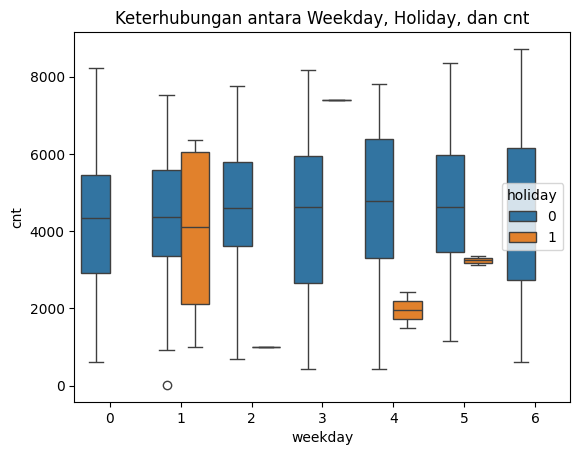

In [56]:
fig, ax = plt.subplots()
sns.boxplot(x='weekday', y='cnt', hue='holiday', data=days_df, ax=ax)
ax.set_title('Keterhubungan antara Weekday, Holiday, dan cnt')
plt.show()

In [50]:
correlation, p_value = pointbiserialr(days_df['workingday'], days_df['cnt'])
print(f"Korelasi Point-Biserial: {correlation}, p-value: {p_value}")

Korelasi Point-Biserial: 0.06115606306052079, p-value: 0.09849496160024866


In [58]:
mean_values = days_df.groupby(['weekday', 'workingday'])['cnt'].mean().reset_index()
print("\nRata-rata cnt berdasarkan weekday dan workingday:")
print(mean_values)


Rata-rata cnt berdasarkan weekday dan workingday:
    weekday  workingday          cnt
0         0           0  4228.828571
1         1           0  3973.666667
2         1           1  4398.866667
3         2           0  1013.000000
4         2           1  4544.621359
5         3           0  7403.000000
6         3           1  4520.825243
7         4           0  1960.000000
8         4           1  4720.343137
9         5           0  3247.000000
10        5           1  4718.588235
11        6           0  4550.542857


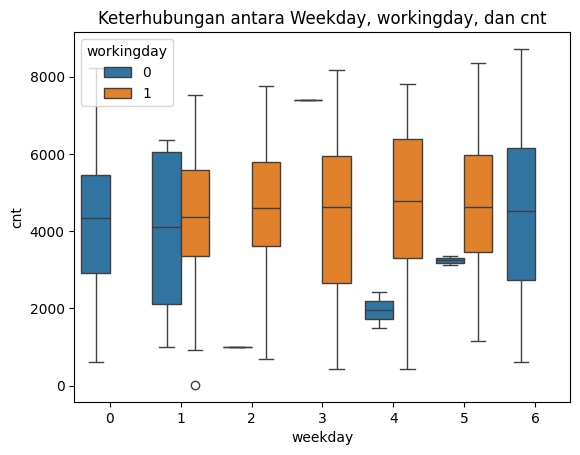

In [60]:
fig, ax = plt.subplots()
sns.boxplot(x='weekday', y='cnt', hue='workingday', data=days_df, ax=ax)
ax.set_title('Keterhubungan antara Weekday, workingday, dan cnt')
plt.show()

In [52]:
days_df.groupby("workingday").agg({
    "cnt":["mean","std","max","min"]
})

cnt                        
                   mean          std   max  min
workingday                                     
0           4330.168831  2052.141245  8714  605
1           4584.820000  1878.415583  8362   22

In [53]:
days_df.groupby("holiday").agg({
    "cnt":["mean","std","max","min"]
})

cnt                         
                mean          std   max   min
holiday                                      
0        4527.104225  1929.013947  8714    22
1        3735.000000  2103.350660  7403  1000

In [62]:
days_df.groupby("weekday").agg({
    "cnt" : ["sum","mean","std","min","max"]
})

cnt                                      
            sum         mean          std   min   max
weekday                                              
0        444027  4228.828571  1872.496629   605  8227
1        455503  4338.123810  1793.074013    22  7525
2        469109  4510.663462  1826.911642   683  7767
3        473048  4548.538462  2038.095884   441  8173
4        485395  4667.259615  1939.433317   431  7804
5        487790  4690.288462  1874.624870  1167  8362
6        477807  4550.542857  2196.693009   627  8714

In [36]:
days_df[['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


In [78]:
days_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [79]:
days_df.groupby(by="weathersit").agg({
    "cnt" : ["sum","mean","std","min","max"]
})

cnt                                     
                sum         mean          std  min   max
weathersit                                              
1           2257952  4876.786177  1879.483989  431  8714
2            996858  4035.862348  1809.109918  605  8362
3             37869  1803.285714  1240.284449   22  4639

#### Explore `hours_df`

In [63]:
hours_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8385,8386,2011-12-21,1,0,12,1,0,3,1,2,0.36,0.3636,0.66,0.1045,1,10,11
6957,6958,2011-10-22,4,0,10,12,0,6,0,1,0.46,0.4545,0.55,0.0896,132,211,343
1472,1473,2011-03-06,1,0,3,16,0,0,0,3,0.36,0.3333,1.00,0.2836,3,8,11
6846,6847,2011-10-17,4,0,10,20,0,1,1,1,0.52,0.5000,0.77,0.1045,40,189,229
11803,11804,2012-05-12,2,1,5,0,0,6,0,1,0.52,0.5000,0.42,0.1642,25,111,136


In [64]:
# Mapping seasons
seasons = {1:"springer", 2: "summer", 3: "fall", 4:"winter"}
hours_df['season'] = hours_df["season"].apply(lambda x: seasons[x])

In [65]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [66]:
time_categories = {
    (0, 5): 'night',
    (6, 11): 'morning',
    (12, 17): 'afternoon',
    (18, 23): 'evening'
}
# pengelompokan berdasrkan kategori waktu
def categorize_time(hour):
    for time_range, category in time_categories.items():
        if time_range[0] <= hour <= time_range[1]:
            return category

hours_df['time_category'] = hours_df['hr'].apply(categorize_time)

In [84]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        17379 non-null  int64         
 1   dteday         17379 non-null  datetime64[ns]
 2   season         17379 non-null  object        
 3   yr             17379 non-null  int64         
 4   mnth           17379 non-null  int64         
 5   hr             17379 non-null  int64         
 6   holiday        17379 non-null  int64         
 7   weekday        17379 non-null  int64         
 8   workingday     17379 non-null  int64         
 9   weathersit     17379 non-null  int64         
 10  temp           17379 non-null  float64       
 11  atemp          17379 non-null  float64       
 12  hum            17379 non-null  float64       
 13  windspeed      17379 non-null  float64       
 14  casual         17379 non-null  int64         
 15  registered     1737

In [85]:
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [67]:
hours_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_category
3717,3718,2011-06-08,summer,0,6,19,0,3,1,1,0.82,0.8030,0.59,0.1343,61,323,384,evening
1430,1431,2011-03-04,springer,0,3,21,0,5,1,2,0.30,0.2879,0.70,0.2239,6,64,70,evening
9594,9595,2012-02-09,springer,1,2,17,0,4,1,1,0.34,0.3333,0.34,0.1343,12,387,399,afternoon
11848,11849,2012-05-13,summer,1,5,21,0,0,0,2,0.64,0.6212,0.53,0.1940,48,121,169,evening
11591,11592,2012-05-03,summer,1,5,4,0,4,1,2,0.46,0.4545,0.88,0.2537,0,2,2,night


In [68]:
hours_df.groupby(["season","time_category"]).agg({
    "casual" : ["sum","max", "min", "mean", "std",],
    "registered" : ["sum","max", "min", "mean", "std",],
    "cnt" : ["sum","max", "min", "mean", "std",]
})

casual                                registered       \
                           sum  max min       mean        std        sum  max   
season   time_category                                                          
fall     afternoon      106483  350   1  94.399823  61.291648     289990  885   
         evening         65418  237   0  58.304813  37.992179     276349  886   
         morning         46428  228   0  41.196096  38.097049     239373  780   
         night            7762   63   0   6.936550   8.948196      29326  170   
springer afternoon       35615  367   0  32.915896  42.846599     155093  642   
         evening         11493  221   0  10.641667  17.504304     119596  681   
         morning         11885  226   0  11.076421  17.057840     123956  628   
         night            1629   27   0   1.617676   2.996652      12081   88   
summer   afternoon      104220  361   0  94.402174  75.423732     258638  782   
         evening         52375  266   0  47.441123  40.383791     229600  770   
         morning         40978  268   0  37.117754  41.843410     204826  696   
         night            5949   68   0   5.422972   7.697150      22003  152   
winter   afternoon       73862  362   0  69.615457  66.462197     268841  876   
         evening         24928  186   0  23.472693  24.081246     206350  822   
         morning         27057  258   0  25.622159  33.402844     212816  808   
         night            3935   49   0   3.736942   5.880474      23824  234   

                                                       cnt           \
                       min        mean         std     sum  max min   
season   time_category                                                
fall     afternoon       9  257.083333  150.511981  396473  976  11   
         evening        17  246.300357  163.854034  341767  977  20   
         morning         1  212.398403  160.026475  285801  808   1   
         night           0   26.207328   28.491939   37088  207   1   
springer afternoon       3  143.339187   98.851866  190708  782   3   
         evening         2  110.737037  103.380567  131089  801   2   
         morning         0  115.522833  113.056467  135841  662   1   
         night           0   11.997021   14.427270   13710  113   1   
summer   afternoon      13  234.273551  139.146978  362858  957  15   
         evening        11  207.971014  152.237679  281975  868  11   
         morning         2  185.530797  149.138077  245804  745   2   
         night           0   20.057429   23.127491   27952  206   1   
winter   afternoon      17  253.384543  142.848221  342703  967  18   
         evening         6  194.303202  147.713437  231278  899   6   
         morning         1  201.530303  161.694203  239873  839   3   
         night           0   22.624881   26.879552   27759  283   1   

                                                
                              mean         std  
season   time_category                          
fall     afternoon      351.483156  180.817020  
         evening        304.605169  184.983038  
         morning        253.594499  169.490763  
         night           33.143878   35.831371  
springer afternoon      176.255083  123.801001  
         evening        121.378704  113.516201  
         morning        126.599254  118.300913  
         night           13.614697   16.480499  
summer   afternoon      328.675725  181.783049  
         evening        255.412138  177.327755  
         morning        222.648551  162.071902  
         night           25.480401   29.474501  
winter   afternoon      323.000000  177.869127  
         evening        217.775895  160.541234  
         morning        227.152462  170.868239  
         night           26.361823   31.600873

In [69]:
hours_df[['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


In [80]:
hours_df.groupby(by="weathersit").agg({
    "cnt" : ["sum","mean","std","min","max"]
})

cnt                                 
                sum        mean         std min  max
weathersit                                          
1           2338173  204.869272  189.487773   1  977
2            795952  175.165493  165.431589   1  957
3            158331  111.579281  133.781045   1  891
4               223   74.333333   77.925178  23  164

In [83]:
hours_df.groupby(["weathersit","time_category"]).agg({
    "cnt" : ["sum","mean","std","min","max"]
})

cnt                                  
                             sum        mean         std  min  max
weathersit time_category                                          
1          afternoon      942284  326.954892  183.278057   24  976
           evening        742290  243.933618  179.772141    6  977
           morning        579067  218.022214  166.408663    1  839
           night           74532   26.317797   31.456799    1  249
2          afternoon      287071  259.323397  157.310046    3  957
           evening        192986  203.357218  158.172601    9  899
           morning        288481  211.032187  163.387848    1  817
           night           27414   24.454951   29.315372    1  283
3          afternoon       63351  164.548052  154.979194    7  856
           evening         50669  135.117333  141.402532    2  891
           morning         39771  118.014837  111.867281    1  646
           night            4540   14.099379   18.584724    1  117
4          afternoon          36   36.000000         NaN   36   36
           evening           164  164.000000         NaN  164  164
           night              23   23.000000         NaN   23   23

### Explore `days_df` & `hours_df`

**Menggabungkan kedua data** `day_df` dan `hours_df`

In [70]:
days_df_copy = days_df.add_suffix('_day')
hours_df_copy = hours_df.add_suffix('_hour')

# Menggabungkan data berdasarkan kolom 'dteday'
merged_df = pd.merge(days_df_copy, hours_df_copy, left_on='dteday_day', right_on='dteday_hour', how='inner')


In [71]:
merged_df.head()

,instant_day,dteday_day,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour,time_category_hour
0,1,2011-01-01,springer,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.81,0.0,3,13,16,night
1,1,2011-01-01,springer,0,1,0,6,0,2,0.344167,...,0,1,0.22,0.2727,0.80,0.0,8,32,40,night
2,1,2011-01-01,springer,0,1,0,6,0,2,0.344167,...,0,1,0.22,0.2727,0.80,0.0,5,27,32,night
3,1,2011-01-01,springer,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.75,0.0,3,10,13,night
4,1,2011-01-01,springer,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.75,0.0,0,1,1,night


In [74]:
merged_df.groupby(["dteday_day","time_category_hour"]).agg({
    "cnt_hour":["mean","min","max","std","sum"]
})

cnt_hour                           
                                     mean  min  max        std   sum
dteday_day time_category_hour                                       
2011-01-01 afternoon            92.333333   67  110  15.577762   554
           evening              34.833333   28   39   3.763863   209
           morning              19.833333    2   56  21.655638   119
           night                17.166667    1   40  16.017699   103
2011-01-02 afternoon            73.666667   59   93  11.587349   442
...                                   ...  ...  ...        ...   ...
2012-12-30 night                18.666667    2   41  14.236104   112
2012-12-31 afternoon           227.833333  164  315  50.720476  1367
           evening              88.333333   49  122  29.568001   530
           morning             125.833333   40  196  56.453225   755
           night                12.833333    1   34  12.172373    77

[2911 rows x 5 columns]

In [76]:
merged_df.groupby(["dteday_day"]).agg({
    "cnt_hour":"sum",
    "cnt_day":"max"
})

,cnt_hour,cnt_day
dteday_day,,
2011-01-01,985,985
2011-01-02,801,801
2011-01-03,1349,1349
2011-01-04,1562,1562
2011-01-05,1600,1600
...,...,...
2012-12-27,2114,2114
2012-12-28,3095,3095
2012-12-29,1341,1341


**Insight:**

***explore day***
- Menganalisis nilai suatu jumlah penyewaan berdasarkan seasion menunjukan perbedaan ramainya jumlah penyewaan sepeda
dilihat dari angka min dan total nya untuk fall dan summer mempunya angka min yang lebih besar dari beberapa season
-Sebaran data pada setiap musim memiliki nilai yang berbeda terutama saat fall dan summer menunjukan ada lonjakan data yang signifakan bervariasi dan
persebarannya cukup tidak merata
-Jumlah penyewaan berdasarkan bulan ada suatu skilus pola yang mana pada awal bulan sampe pertengahan tahun menunjukan kenaikan pengguna dan puncaknya pada bulan yang memasuki summer dan sampai akhir tahun terjadi penurunan.
- Melihat Korelasi antara holiday dengan jumlah penyewa dan workingday dengan jumlah penyewa dengan metode point-biserial semuanya mendapatkan p-value lebih dari 0.05 yang artinya tidak ada korelasi diantara keduanya.
- Melihat korelasi dengan menilik nilai rata antara holiday dan cnt dan workingday dan cnt mempunyai nilai yang cukup signifikan adanya perbedaan antara keduanya terutama untuk holiday meskipun di lihat dari std mempunyai sebaran yang significan bervariasi dan sebaran data yang kurang merata
- Melihat jumlah penyewa berdasarakan hari pada hari 5 atau jumat memiliki pengguna yang paling ramai
- Melihat korelasi dengan suhu, kelembapan dan kecepatan angin, memiliki korelasi yang cukup kuat dengan jumlah penyewa tetapi tidak terlalu signifikan
- Cuaca cerah memliki total yanga paling banyak jumlah penyewa

***explore hours***
- ada sebuah perbedaan jumlah penyewa berdasarkan kategori waktu dan musim dan lonjakan pada kategori waktu afternoon di setiap season
- jumlah penyewa sepeda lebih banyak ketika waktu siang dengan cuaca yang cerah

***explore merged***
- semua data total penyewa di hitung dari perday dan hours jumlahnya sama menunjukan tidak ada kesalahan dalam total penyewa Meskipun di bagi dalam waktu yang kecil

## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa besar pengaruh musim terhadap jumlah penyewaan sepeda

In [86]:
rental_based_seasson_df = days_df.groupby(by="season").agg({
    "cnt" :"sum"
})

In [88]:
rental_based_seasson_df

,cnt
season,
fall,1061129
springer,471348
summer,918589
winter,841613


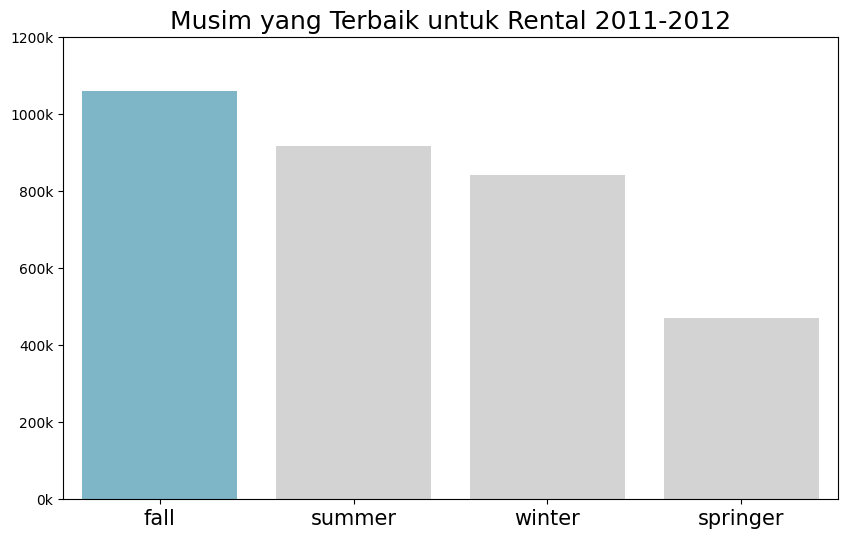

In [95]:

plt.figure(figsize=(10, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]


sns.barplot(x="season", y="cnt", data=rental_based_seasson_df.sort_values(by="cnt", ascending=False), palette=colors)
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(y / 1000)}k' for y in plt.yticks()[0]])

plt.ylabel(None)
plt.xlabel(None)
plt.title("Musim yang Terbaik untuk Rental 2011-2012", loc="center", fontsize=18)


plt.tick_params(axis='x', labelsize=15)
plt.show()

### Pertanyaan 2: - Apakah ada pola tertentu di hari-hari tertentu, misalnya akhir pekan dibandingkan hari kerja?

In [102]:
workingday_df = days_df.copy()
categories = {0:"not work", 1: "work"}
workingday_df["workingday"] = workingday_df["workingday"].apply(lambda x : categories[x] )
workingday_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,not work,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,not work,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,work,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,work,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,work,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,1,12,0,4,work,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,springer,1,12,0,5,work,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,springer,1,12,0,6,not work,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,springer,1,12,0,0,not work,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [105]:
workingday_df = workingday_df.groupby(["weekday","workingday"]).agg({
    "cnt":"sum"
})
workingday_df

cnt
weekday workingday        
0       not work    444027
1       not work     59605
        work        395898
2       not work      1013
        work        468096
3       not work      7403
        work        465645
4       not work      3920
        work        481475
5       not work      6494
        work        481296
6       not work    477807

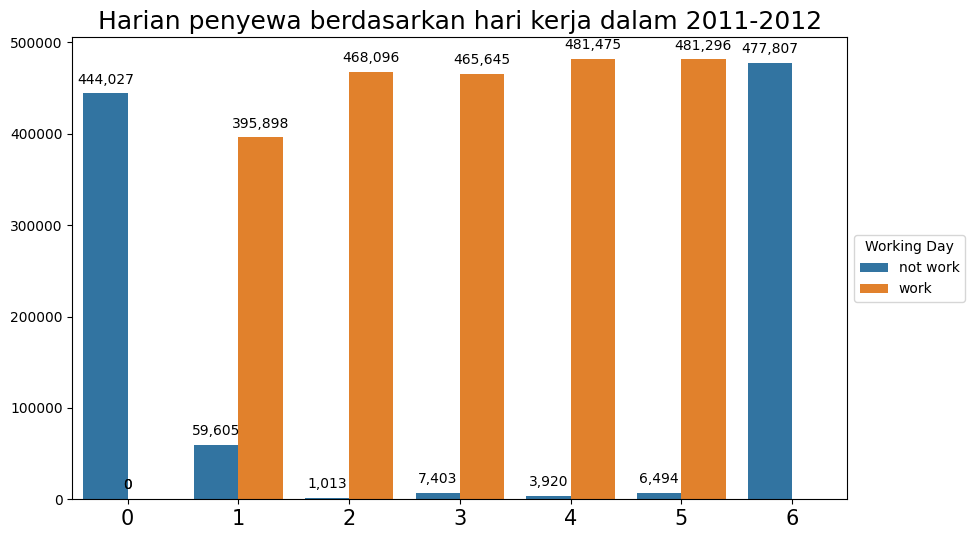

In [112]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=workingday_df, x="weekday", y="cnt", hue="workingday", errorbar=None)
plt.ylabel(None)
plt.xlabel(None)
plt.title("Harian penyewa berdasarkan hari kerja dalam 2011-2012", loc="center", fontsize=18)
for p in barplot.patches:
    barplot.annotate(format(int(p.get_height()), ','),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')
plt.legend(title='Working Day', bbox_to_anchor=(1, 0.5), loc='center left')

plt.tick_params(axis='x', labelsize=15)
plt.show()


### Pertanyaan 3: Bagaimana tren penggunaan sepeda untuk pengguna casual dibandingkan dengan pengguna terdaftar seiring berjalannya waktu? Apakah ada peningkatan atau penurunan dalam periode tertentu


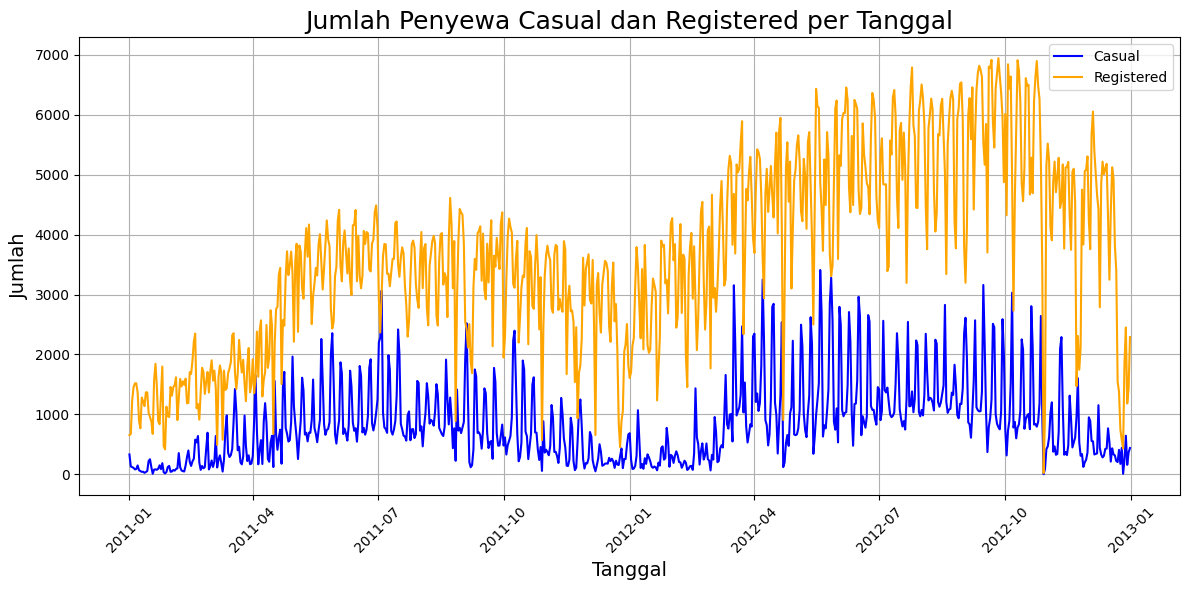

In [116]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=days_df, x='dteday', y='casual', label='Casual', color='blue')
sns.lineplot(data=days_df, x='dteday', y='registered', label='Registered', color='orange')


plt.title("Jumlah Penyewa Casual dan Registered per Tanggal", fontsize=18)
plt.xlabel("Tanggal", fontsize=14)
plt.ylabel("Jumlah", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Pertanyaan 4: Suasana cuaca seperti apa yang menjadikan jumlah penyewaan semakin banyak dan sedikit


In [118]:
days_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [124]:
weather_df = hours_df.groupby("weathersit").agg({
    "cnt":"sum"
})
weather_df

,cnt
weathersit,
1,2338173
2,795952
3,158331
4,223


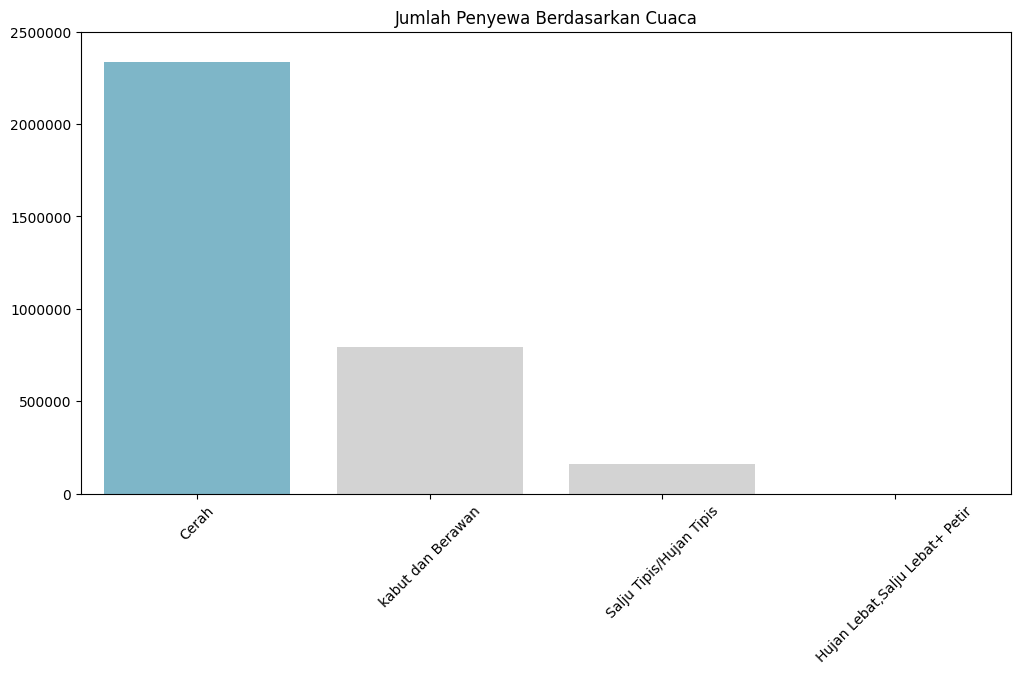

In [127]:
plt.figure(figsize=(12, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(data=weather_df, x="weathersit", y="cnt", palette=colors)
plt.xticks(ticks=[0, 1, 2, 3],
           labels=['Cerah','kabut dan Berawan', 'Salju Tipis/Hujan Tipis', 'Hujan Lebat,Salju Lebat+ Petir'],
           rotation=45)


plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(y)}' for y in plt.yticks()[0]])
plt.ylabel(None)
plt.xlabel(None)
plt.title("Jumlah Penyewa Berdasarkan Cuaca")
plt.show()

Berdasarkan kategori waktu dan cuaca

In [129]:
weather_time_df = hours_df.groupby(["weathersit","time_category"]).agg({
    "cnt":"sum"
})
weather_time_df

cnt
weathersit time_category        
1          afternoon      942284
           evening        742290
           morning        579067
           night           74532
2          afternoon      287071
           evening        192986
           morning        288481
           night           27414
3          afternoon       63351
           evening         50669
           morning         39771
           night            4540
4          afternoon          36
           evening           164
           night              23

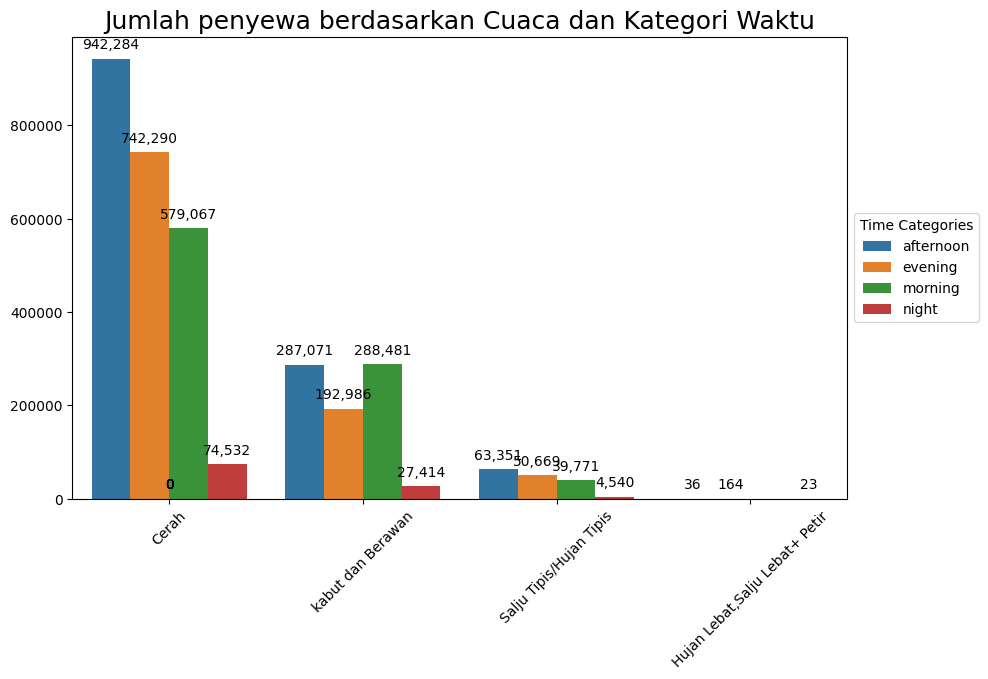

In [132]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=weather_time_df, x="weathersit", y="cnt", hue="time_category", errorbar=None)
plt.ylabel(None)
plt.xlabel(None)
plt.title("Jumlah penyewa berdasarkan Cuaca dan Kategori Waktu", loc="center", fontsize=18)
for p in barplot.patches:
    barplot.annotate(format(int(p.get_height()), ','),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')
plt.legend(title='Time Categories', bbox_to_anchor=(1, 0.5), loc='center left')
plt.xticks(ticks=[0, 1, 2, 3],
           labels=['Cerah','kabut dan Berawan', 'Salju Tipis/Hujan Tipis', 'Hujan Lebat,Salju Lebat+ Petir'],
           rotation=45)
plt.show()

#### Pertanyaan 5 : Diwaktu dalam jam berapa jumlah penyewaan semakin banyak dan sedikit?

In [134]:
hours_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_category'],
      dtype='object')

In [135]:
start_date = '2011-01-01'
end_date = '2011-01-31'
category_time_january_df = hours_df[(hours_df['dteday'] >= start_date) & (hours_df['dteday'] <= end_date)]

In [137]:
category_time_january_df = hours_df.groupby("time_category").agg({
    "cnt" : "sum"
})
category_time_january_df

,cnt
time_category,
afternoon,1292742
evening,986109
morning,907319
night,106509


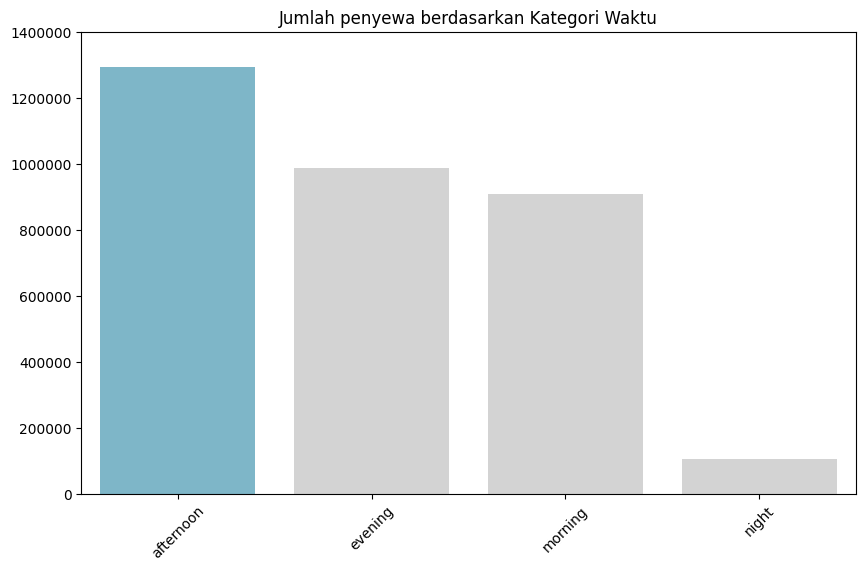

In [139]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=category_time_january_df, x="time_category", y="cnt", palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(y)}' for y in plt.yticks()[0]])
plt.title("Jumlah penyewa berdasarkan Kategori Waktu", loc="center", fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight:**
1. Jumlah Penyewa Berdasarkan Musim:

- Fall: Musim ini memiliki jumlah penyewa terbanyak.
- Spring: Meskipun awalnya diprediksi jumlah penyewa akan sedikit di musim dingin (winter), data menunjukkan bahwa jumlah penyewa pada musim spring justru rendah. Ini menunjukkan bahwa musiman tertentu bisa mengejutkan dalam hal perilaku penyewa.
2. Penyewa Berdasarkan Hari Kerja:

- Data menunjukkan bahwa total jumlah penyewa pada hari kerja (working day) cenderung lebih tinggi dibandingkan dengan hari non-kerja (non-working day). Ini menunjukkan bahwa program bike sharing lebih populer di hari kerja.
3. Tren Kenaikan Keanggotaan:

- Setelah program bike sharing diluncurkan, terdapat tren kenaikan jumlah anggota yang signifikan. Kenaikan ini mencapai puncaknya di pertengahan tahun 2012, sebelum mengalami penurunan di akhir tahun. Ini bisa menunjukkan adanya faktor musiman atau kepuasan anggota yang berfluktuasi.
4. Suasana yang Paling Disukai:

- Cuaca cerah menjadi faktor utama yang meningkatkan jumlah penyewa. Waktu yang paling ramai adalah siang hari saat cuaca cerah, menunjukkan bahwa kondisi cuaca berperan penting dalam keputusan orang untuk menyewa sepeda.
5. Waktu Penyewaan Sepeda:

- Waktu paling ramai untuk penyewaan terjadi antara jam 12:00 hingga 17:00. Sebaliknya, waktu dengan penyewaan paling sedikit adalah antara jam 0:00 hingga 5:00, menunjukkan pola aktivitas yang sesuai dengan jam kerja dan aktivitas sehari-hari.

## Analisis Lanjutan (Opsional)

melakukan pengelompokan clustering jumlah penyewa dalam harian

In [140]:
labels=['low','mid','high','very high']
days_df["cluster_cnt"] =  pd.cut(days_df['cnt'], bins=4, labels=labels, right=False)
days_df

,instant,dteday,season,yr,mnth,...,windspeed,casual,registered,cnt,cluster_cnt
0,1,2011-01-01,springer,0,1,...,0.160446,331,654,985,low
1,2,2011-01-02,springer,0,1,...,0.248539,131,670,801,low
2,3,2011-01-03,springer,0,1,...,0.248309,120,1229,1349,low
3,4,2011-01-04,springer,0,1,...,0.160296,108,1454,1562,low
4,5,2011-01-05,springer,0,1,...,0.186900,82,1518,1600,low
...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,1,12,...,0.350133,247,1867,2114,low
727,728,2012-12-28,springer,1,12,...,0.155471,644,2451,3095,mid
728,729,2012-12-29,springer,1,12,...,0.124383,159,1182,1341,low
729,730,2012-12-30,springer,1,12,...,0.350754,364,1432,1796,low


In [143]:
start_date = '2011-01-01'
end_date = '2011-01-31'
cluster_day_january_df = days_df[(days_df['dteday'] >= start_date) & (days_df['dteday'] <= end_date)]

In [145]:
cluster_day_january_df = cluster_day_january_df.groupby("cluster_cnt").agg({
    "cnt":"sum"
})

In [147]:
cluster_day_january_df

,cnt
cluster_cnt,
low,38189
mid,0
high,0
very high,0


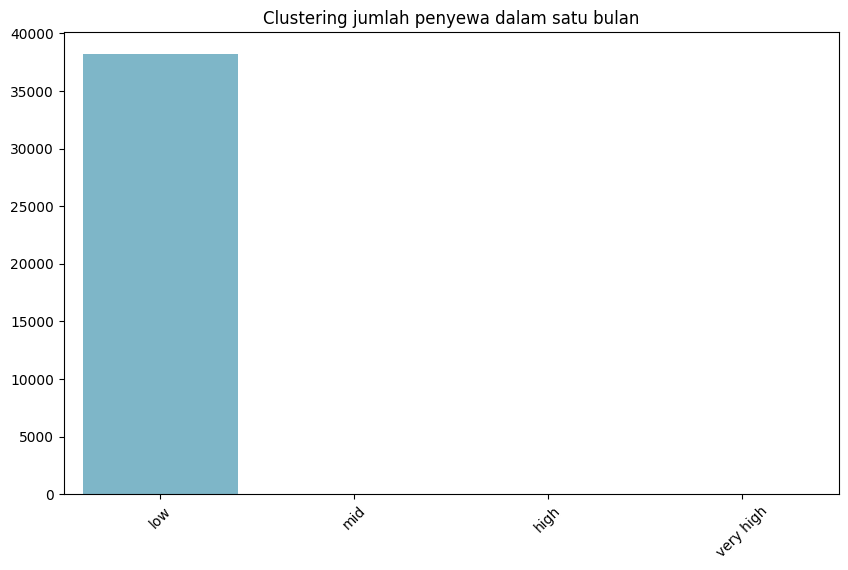

In [146]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=cluster_day_january_df, x="cluster_cnt", y="cnt", palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.title("Clustering jumlah penyewa dalam satu bulan", loc="center", fontsize=12)
plt.xticks(rotation=45)
plt.show()

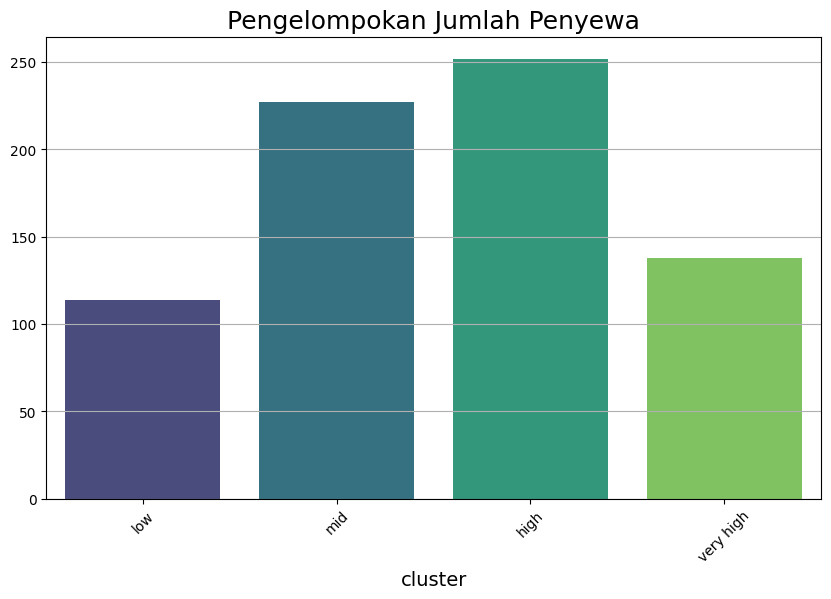

In [151]:
plt.figure(figsize=(10, 6))
sns.countplot(data=days_df, x='cluster_cnt', palette='viridis')

plt.title('Pengelompokan Jumlah Penyewa', fontsize=18)
plt.xlabel('cluster', fontsize=14)
plt.ylabel(None)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

## Conclusion

- Conclution pertanyaan 1


1.   Fall: Musim ini memiliki jumlah penyewa terbanyak
2.   Spring: Musim ini memiliki sedikit penyewa


- Conclution pertanyaan 2

1.  Hari Kerja cenderung penggunaan Bike-Sharing lebih tinggi

- Conclution pertanyaan 3

1.  program bike sharing diluncurkan terjadi tren kenaikan menjadi keanggotaan

- Conclution pertanyaan 4

1.  Cuaca cerah menjadi faktor peningkatannya jumlah penyewaan sepeda

- Conclution pertanyaan 5
1.  Waktu ramai penyewaan terjadi pada siang hari dan sepi ketika malam hari